In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time

In [10]:
from rms import Planet, Star, Spot, STSP

k62f = Planet(per=267.291, inc=89.9, a=241.09992254527495, 
              t0=2455422.71, rp=0.020231403622250968, ecc=0, w=90, lam=0)
k62e = Planet(per=122.3874, inc=89.98, a=143.22933849550512, 
              t0=2454983.404, rp=0.02312160413971539, ecc=0, w=90, lam=0)

In [47]:
times = Time(np.arange(k62f.t0 - 1, k62f.t0 + 1, 10/60/60/24), format='jd')

k62 = Star(k62f, rotation_period=39.3, inc_stellar=90)

lcs_f = []

for i in range(100):
    spots = [Spot.from_sunspot_distribution() for _ in range(20)]
    with STSP(times, k62, spots) as stsp: 
        lc = stsp.generate_lightcurve(normalize_oot=True)
    lcs_f.append(lc)


Spots tossed:

<Spot: lat=-12.650457468832737 deg, lon=3.0960893754029524 rad, rad=0.008087565290082225> [rms.stsp]

Spots tossed:

<Spot: lat=-18.345389969209823 deg, lon=3.5777539354091252 rad, rad=0.006388719618412963> [rms.stsp]

Spots tossed:

<Spot: lat=-7.142919399877258 deg, lon=4.828417305230708 rad, rad=0.007572372610093532> [rms.stsp]


Text(0.5,1,'Kepler-62 f: max(transit residual)/depth = 0.0391')

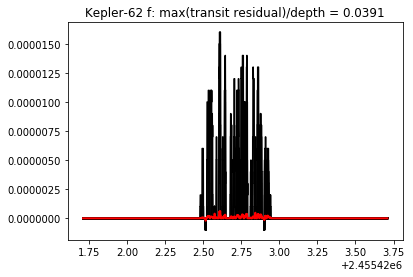

In [48]:
median_lc = np.nanmedian([lc.fluxes for lc in lcs_f if len(lc.fluxes) > 8000], axis=0)

mean = np.nanmean([lc.fluxes for lc in lcs_f if len(lc.fluxes) > 8000], axis=0)

max_resid = 0
for lc in lcs_f: 
    if len(lc.fluxes) > 8000:
        plt.plot(lc.times.jd, lc.fluxes - median_lc, color='k')
        max_resid = max([max_resid, max(lc.fluxes - median_lc)])

plt.plot(lc.times.jd, mean - median_lc, color='r', lw=2)
plt.title('Kepler-62 f: max(transit residual)/depth = {0:.4f}'.format(max_resid/k62f.rp**2))

In [49]:
k62 = Star(k62e, rotation_period=39.3, inc_stellar=90)
times = Time(np.arange(k62e.t0 - 1, k62e.t0 + 1, 10/60/60/24), format='jd')

lcs_e = []

for i in range(100):
    spots = [Spot.from_sunspot_distribution() for _ in range(20)]
    with STSP(times, k62, spots) as stsp: 
        lc = stsp.generate_lightcurve(normalize_oot=True)
    lcs_e.append(lc)

Text(0.5,1,'Kepler-62 e: max(transit residual)/depth = 0.0243')

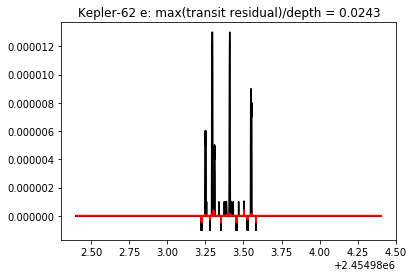

In [50]:
median_lc = np.nanmedian([lc.fluxes for lc in lcs_e if len(lc.fluxes) > 8000], axis=0)

mean = np.nanmean([lc.fluxes for lc in lcs_e if len(lc.fluxes) > 8000], axis=0)

max_resid = 0
for lc in lcs_e: 
    if len(lc.fluxes) > 8000:
        plt.plot(lc.times.jd, lc.fluxes - median_lc, color='k')
        max_resid = max([max_resid, max(lc.fluxes - median_lc)])

plt.plot(lc.times.jd, mean - median_lc, color='r', lw=2)
plt.title('Kepler-62 e: max(transit residual)/depth = {0:.4f}'.format(max_resid/k62e.rp**2))